
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'Mission_Impossible_6_Review.txt'
}
# Text Summarization & Visualization

## Setup
To prepare your environment, you need to install some packages.

### Install the necessary packages

You need the latest versions of these packages:<br>

In [1]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 42kB/s  eta 0:00:01
Requirement not upgraded as not directly required: scipy>=0.18.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: six>=1.5.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: numpy>=1.11.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: boto>=2.32 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: boto3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: charde

In [2]:
!pip install watson-developer-cloud==1.5

    100% |████████████████████████████████| 225kB 4.0MB/s eta 0:00:01
Requirement not upgraded as not directly required: requests<3.0,>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: python_dateutil>=2.5.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
    100% |████████████████████████████████| 307kB 3.1MB/s eta 0:00:01
    100% |████████████████████████████████| 3.1MB 327kB/s eta 0:00:01
Requirement not upgraded as not directly required: pyOpenSSL>=16.2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0,>=2.0->watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/py

In [3]:
!pip install pyldavis

    100% |████████████████████████████████| 1.6MB 632kB/s eta 0:00:01    43% |██████████████                  | 706kB 41.0MB/s eta 0:00:01
Requirement not upgraded as not directly required: wheel>=0.23.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: numpy>=1.9.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: scipy>=0.18.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: pandas>=0.17.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
    100% |████████████████████████████████| 276kB 3.7MB/s eta 0:00:01
Requirement not upgraded as not directly required: jinja2>=2.7.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: numexpr in /opt/conda/envs/DSX-Pyth

In [4]:
!pip install wordcloud

    100% |████████████████████████████████| 358kB 2.7MB/s eta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pillow->wordcloud)


In [5]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import watson_developer_cloud
import ibm_boto3
from botocore.client import Config
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /home/ds

True

## 1. Summarization & keywords extraction

### 1a. Read the Data
Click on Insert to code and then select Insert Credentials as credentials_1

In [12]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'Mission_Impossible_6_Review.txt'
}

credentials_2 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'Richwine.txt'
}

credentials_3_2 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'Chavez.txt'
}

credentials_3 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'Chavez.txt'}
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_4 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'RichCha.txt'
}
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_5 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'Frank.txt'
}
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_6 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'Lodge.txt'
}
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_7 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'Glazer-m.txt'
}
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_9 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'all.txt'
}
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_10 = {
    'IBM_API_KEY_ID': 'qMQ0q2CXDiOWd0LXP8IwNUwrLUfX0hjaOpOK6r7ioGn8',
    'IAM_SERVICE_ID': 'iam-ServiceId-69636595-c7b4-451a-b26e-b9a67a5b1181',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'textsummarizer-donotdelete-pr-jw3aso7wwj713f',
    'FILE': 'all.txt'
}


### 1b. Functions to extract files from Cloud Object Storage

In [13]:
cos = ibm_boto3.client('s3',
                    ibm_api_key_id=credentials_10['IBM_API_KEY_ID'],
                    ibm_service_instance_id=credentials_10['IAM_SERVICE_ID'],
                    ibm_auth_endpoint=credentials_10['IBM_AUTH_ENDPOINT'],
                    config=Config(signature_version='oauth'),
                    endpoint_url=credentials_10['ENDPOINT'])

def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_10['BUCKET'], Key=filename)['Body']
    return fileobject

def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

### 1c. Get File Contents

In [14]:
text=str(load_string(get_file("Chavez.txt")))
text_2 = str(load_string(get_file("Richwine.txt")))
text3 = str(load_string(get_file("RichCha.txt")))
text4 = str(load_string(get_file("Frank.txt")))
text5 = str(load_string(get_file("Lodge.txt")))
text6 = str(load_string(get_file("Glazer-m.txt")))
text7 = str(load_string(get_file("all.txt")))

### 1d. Helper functions to extract summary and keywords

In [15]:
'''Get the summary of the text'''

def get_summary(text, pct):
    summary = summarize(text,ratio=pct,split=True)
    return summary

'''Get the keywords of the text'''

def get_keywords(text):
    res = keywords(text, ratio=0.1, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

'''Tokenize the sentence into words & remove punctuation'''

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

def split_into_tokens(text):
    """ Split text into tokens.
    """
    tokens = nltk.word_tokenize(text)
    return tokens
    
def POS_tagging(text):
    """ Generate Part of speech tagging of the text.
    """
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

In [16]:
print('Printing Summary')
print('--------------------------')
print(get_summary(text7, 0.2))
print ('-------------------------')
print('Printing Keywords')
print('--------------------------')
print(get_keywords(text7))

Printing Summary
--------------------------
['The idea that Latinos won\\\'t assimilate because they\\\'re doomed to low IQs for generations is offensive.\\r\\n\\r\\n\\tMany optimistic observers have assumed incorrectly, it turns out  that Hispanic immigrants will follow the same economic trajectory European immigrants did in the early part of the last century.\\\', \\\'Their children outperformed them, and their children\\\'s children were often indistinguishable from the "founding stock." The speed of economic assimilation varied somewhat by ethnic group, but three generations were typically enough to turn "ethnics" into plain old Americans.', "First, the second generation still does not come close to matching the socioeconomic status of white natives.\\', \\'Even if Hispanics were to keep climbing the ladder each generation, their assimilation would be markedly slower than that of other groups., The lack of Hispanic assimilation is likely to create ethnic tensions that threaten our 

### 2a. Remove punctuation & special characters

In [17]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', text)

### 2b. Preprocess the text for next steps

In [18]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### 2c. Create n grams where n is the number of words

In [19]:
from nltk import ngrams
n = 7
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [20]:
print(total_grams[:10])

[('bThis', 'book', 'grew', 'attempt', 'unpack', 'meaning', 'negative'), ('book', 'grew', 'attempt', 'unpack', 'meaning', 'negative', 'view'), ('grew', 'attempt', 'unpack', 'meaning', 'negative', 'view', 'Latinos'), ('attempt', 'unpack', 'meaning', 'negative', 'view', 'Latinos', 'Rather'), ('unpack', 'meaning', 'negative', 'view', 'Latinos', 'Rather', 'considering'), ('meaning', 'negative', 'view', 'Latinos', 'Rather', 'considering', 'isolation'), ('negative', 'view', 'Latinos', 'Rather', 'considering', 'isolation', 'I'), ('view', 'Latinos', 'Rather', 'considering', 'isolation', 'I', 'began'), ('Latinos', 'Rather', 'considering', 'isolation', 'I', 'began', 'see'), ('Rather', 'considering', 'isolation', 'I', 'began', 'see', 'connected')]


### 2d. Create the wordcloud visualization on the processed data
To highlight important textual data points & convey crucial information. The more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.

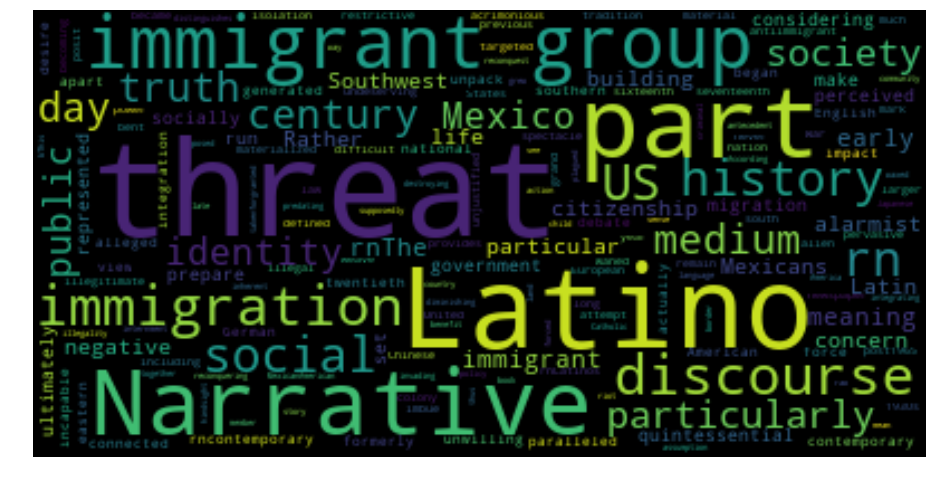

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2e. Analyze the frequency of words in the text. 

In [22]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        print("%s was found %d times" % (word, times))

threat was found 7 times
Latinos was found 4 times
Threat was found 4 times
Latino was found 4 times
immigrant was found 6 times
group was found 4 times
discourse was found 4 times
immigration was found 4 times
Narrative was found 4 times
part was found 6 times


### 2f. Create a Dispersion plot
The motivation behind using the Lexical Dispersion Plots was to give us an alternative means of visualising how prevalent  these words are in the text corpus, whether or not there was a clustering pattern that is whether or not a word featured heavily at certain point of the text corpus.

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


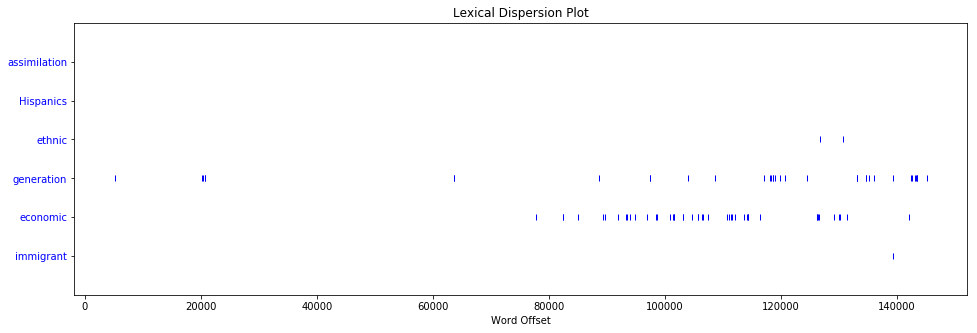

In [23]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['assimilation', 'Hispanics','ethnic', 'generation', 'economic', 'immigrant']
content.dispersion_plot(topics)

## 3. Topic Modelling

### 3a. Start the preprocessing for Topic Modelling

Topic Modelling is an approach for finding topics in large amounts of text. Topic modeling is great for document clustering, information retrieval from unstructured text, and feature selection.
 
Topic Modeling with Latent Dirichlet Allocation technique.

Why Latent Dirichlet Allocation? This technique can create model which can be generalized easily on any new text corpus and help us in identifying the important topics from the corpus. 

Some of the advantages are :

Training documents may come in sequentially, no random access required.

Runs in constant memory w.r.t. the number of documents: size of the training corpus does not affect memory footprint, can process corpora larger than RAM.

Is distributed & makes use of a cluster of machines, if available, to speed up model estimation.

In [24]:
import gensim
from gensim import corpora

tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

### 3b. Creating the object for LDA model & train the model

In [25]:

Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix by selecting minimum parameters required.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

### 3c. Extract two topics with twenty words in each topic

In [26]:
print(ldamodel.print_topics(num_topics=6, num_words=300))

[(0, '0.024*"part" + 0.024*"narrative" + 0.020*"immigrant" + 0.016*"history" + 0.016*"discourse" + 0.016*"social" + 0.011*"concerns" + 0.011*"citizenship" + 0.011*"early" + 0.011*"particular" + 0.011*"identity" + 0.011*"society" + 0.011*"media" + 0.011*"since" + 0.011*"in" + 0.011*"southwest" + 0.011*"mexico" + 0.011*"truths" + 0.007*"community" + 0.007*"quintessential" + 0.007*"american" + 0.007*"integration" + 0.007*"forced" + 0.007*"waxed" + 0.007*"internments" + 0.007*"sixteenth" + 0.007*"antecedents" + 0.007*"socially" + 0.007*"united" + 0.007*"run" + 0.007*"rncontemporary" + 0.007*"tradition" + 0.007*"means" + 0.007*"remain" + 0.007*"difficult" + 0.007*"debates" + 0.007*"century" + 0.007*"policies" + 0.007*"southern" + 0.007*"plagued" + 0.007*"laws" + 0.007*"incapable" + 0.007*"stories" + 0.007*"national" + 0.007*"invading" + 0.007*"contemporary" + 0.007*"riots" + 0.007*"previous" + 0.007*"targeted" + 0.007*"power" + 0.007*"thus" + 0.007*"weaves" + 0.007*"grand" + 0.007*"ultimate

### 3d. Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 

In [27]:
'''Compute Perplexity'''

# a measure of how good the model is. lower the better.

print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.02967027288

Coherence Score:  0.862020764237


#### Coherence score is 'higher the better' metric and given the score of 0.86 we can be assured that we have selected the right number of topics for this corpus.

In [28]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
0      50.409264        1       1  0.087564  0.0
1      49.590736        1       2 -0.087564  0.0, topic_info=     Category      Freq          Term     Total  loglift  logprob
term                                                             
25    Default  5.000000        threat  5.000000  30.0000  30.0000
133   Default  3.000000          part  3.000000  29.0000  29.0000
177   Default  3.000000     narrative  3.000000  28.0000  28.0000
127   Default  2.000000        groups  2.000000  27.0000  27.0000
161   Default  2.000000        latino  2.000000  26.0000  26.0000
30    Default  2.000000       latinos  2.000000  25.0000  25.0000
107   Default  2.000000   immigration  2.000000  24.0000  24.0000
159   Default  2.000000     immigrant  2.000000  23.0000  23.0000
57    Default  2.000000            us  2.000000  22.0000  22.0000
137   Default  2.000000            rn  2.000000  21.0000  21.0000
124   Default  2.000000       history  2.000000  20.0000  20.0000
157   Default  2.000000        social  2.000000  19.0000  19.0000
86    Default  2.000000     discourse  2.000000  18.0000  18.0000
90    Default  1.000000         latin  1.000000  17.0000  17.0000
81    Default  1.000000        public  1.000000  16.0000  16.0000
71    Default  1.000000      building  1.000000  15.0000  15.0000
154   Default  1.000000    immigrants  1.000000  14.0000  14.0000
15    Default  1.000000           day  1.000000  13.0000  13.0000
40    Default  1.000000  particularly  1.000000  12.0000  12.0000
174   Default  1.000000      negative  1.000000  11.0000  11.0000
93    Default  1.000000      mexicans  1.000000  10.0000  10.0000
61    Default  1.000000          life  1.000000   9.0000   9.0000
14    Default  1.000000        rather  1.000000   8.0000   8.0000
183   Default  1.000000       threats  1.000000   7.0000   7.0000
185   Default  1.000000         rnthe  1.000000   6.0000   6.0000
158   Default  1.000000      alarmist  1.000000   5.0000   5.0000
150   Default  1.000000   citizenship  1.000000   4.0000   4.0000
119   Default  1.000000      concerns  1.000000   3.0000   3.0000
89    Default  1.000000         early  1.000000   2.0000   2.0000
103   Default  1.000000    particular  1.000000   1.0000   1.0000
...       ...       ...           ...       ...      ...      ...
183    Topic2  1.425041       threats  1.724364   0.5107  -4.4857
113    Topic2  0.849455        german  1.149331   0.3990  -5.0031
163    Topic2  0.849455   integrating  1.149331   0.3990  -5.0031
24     Topic2  0.849455         their  1.149331   0.3990  -5.0031
63     Topic2  0.849455      together  1.149331   0.3990  -5.0031
152    Topic2  0.849455        aliens  1.149331   0.3990  -5.0031
104    Topic2  0.849455       actions  1.149331   0.3990  -5.0031
42     Topic2  0.849455      formerly  1.149331   0.3990  -5.0031
170    Topic2  0.849455        border  1.149331   0.3990  -5.0031
11     Topic2  0.849455      japanese  1.149331   0.3990  -5.0031
91     Topic2  0.849455         sense  1.149331   0.3990  -5.0031
181    Topic2  0.849455      language  1.149331   0.3990  -5.0031
43     Topic2  0.849455       eastern  1.149331   0.3990  -5.0031
47     Topic2  0.849455     connected  1.149331   0.3990  -5.0031
9      Topic2  0.849455    government  1.149331   0.3990  -5.0031
1      Topic2  0.849455       prepare  1.149331   0.3990  -5.0031
146    Topic2  0.849455     criminals  1.149331   0.3990  -5.0031
41     Topic2  0.849455           the  1.149331   0.3990  -5.0031
31     Topic2  0.849455        posits  1.149331   0.3990  -5.0031
179    Topic2  0.849455    reconquest  1.149331   0.3990  -5.0031
10     Topic2  0.849455       chinese  1.149331   0.3990  -5.0031
151    Topic2  0.849455        desire  1.149331   0.3990  -5.0031
168    Topic2  0.849455          make  1.149331   0.3990  -5.0031
186    Topic2  0.849455          each  1.149331   0.3990  -5.0031

#### We can observe that our LDA model has captured the prominent keywords under two topics in the text corpus which will give us a good understanding of what the text corpus is about. We can do further analysis by using this information to generate recommendations & classify the text for user profiling or push notifications. 

### We have seen how to summarize & visualize a document as well as a news article to get quick information about the data. This methodology can be applied to lot of usecases to extract insights from unstructured data.